# Continuous Data Distributions, Transformations and Scaling

## Uniform Distribution

The **uniform distribution** is characterized by equal probabilities for all outcomes within a specified range [a, b]. It is used for random sampling, fairness modeling, and simulations. There are two types:
1. **Discrete Uniform Distribution:** Each value in a finite set has equal probability.
2. **Continuous Uniform Distribution:** All values within a continuous interval [a, b] are equally likely.

#### **Key Characteristics**
1. **PDF (Probability Density Function):**
   Continuous case:
   $$
   f(x) = \frac{1}{b - a}, \quad \text{for } x \in [a, b]
   $$
2. **CDF (Cumulative Distribution Function):**
   Continuous case:
   $$
   F(x) = \frac{x - a}{b - a}, \quad \text{for } x \in [a, b]
   $$
3. **Mean:** $$\mu = \frac{a + b}{2}$$
4. **Variance:** $$\sigma^2 = \frac{(b - a)^2}{12}$$

### Uniform Distribution Analysis: Iris Dataset

The **Iris dataset** is widely used in statistical modeling and machine learning. It contains data about iris flowers, specifically their **sepal width**, **sepal length**, **petal width**, and **petal length**. While the data itself doesn't inherently follow a uniform distribution, we can simulate uniformity by considering a specific numerical range (e.g., sepal lengths uniformly distributed between minimum and maximum values).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import uniform
import seaborn as sns

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Simulated range for sepal lengths
a, b = iris['sepal_length'].min(), iris['sepal_length'].max()

**What is the probability density for sepal lengths in the uniform distribution?**

In [2]:
# Probability Density Function (PDF)
x = np.linspace(a, b, 1000)  # Simulated range
pdf = uniform.pdf(x, loc=a, scale=b-a)

**What is the cumulative probability of sepal lengths being below a given value (e.g., 6)?**

In [3]:
# Cumulative Distribution Function (CDF)
cdf = uniform.cdf(x, loc=a, scale=b-a)

**What is the mean and variance of the uniform distribution derived from sepal lengths?**

In [4]:
mean = uniform.mean(loc=a, scale=b-a)
variance = uniform.var(loc=a, scale=b-a)
# Print Metrics
print("**Uniform Distribution Metrics:**")
print(f"Range: [{a:.2f}, {b:.2f}]")
print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")

**Uniform Distribution Metrics:**
Range: [4.30, 7.90]
Mean: 6.10
Variance: 1.08


**How can we visualize the PDF and CDF for simulated sepal lengths?**

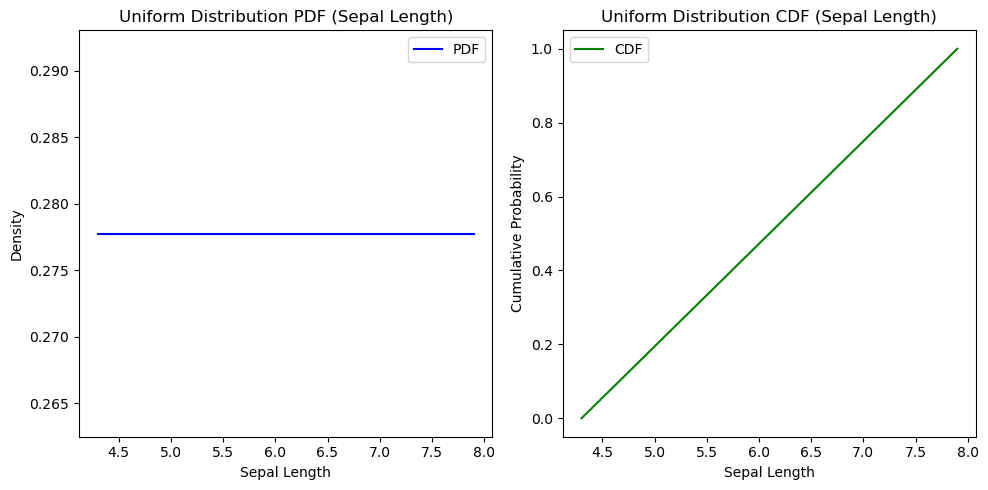

In [5]:
# Visualization: PDF and CDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF', color='blue')
plt.title("Uniform Distribution PDF (Sepal Length)")
plt.xlabel("Sepal Length")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF', color='green')
plt.title("Uniform Distribution CDF (Sepal Length)")
plt.xlabel("Sepal Length")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()

## Normal Distribution

The **normal distribution** is a bell-shaped, symmetric curve used to model natural phenomena like heights, weights, or test scores. The majority of the data is concentrated around the mean (\(\mu\)) with decreasing probabilities as you move away from the center.

#### **Key Properties**
1. **PDF (Probability Density Function):**  
   $$
   f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
   $$  
   Represents the data density around the mean $\mu$.

2. **CDF (Cumulative Distribution Function):**  
   Shows the cumulative probability for $X \leq x$.

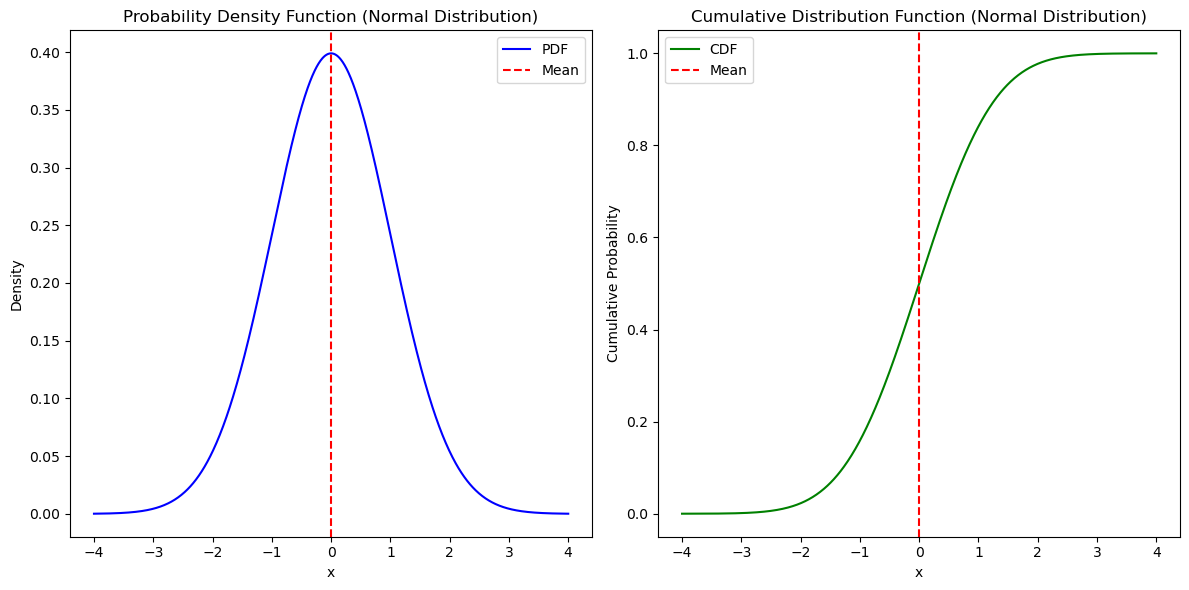

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define normal distribution parameters
mu, sigma = 0, 1  # Mean and standard deviation

# Generate data points for PDF and CDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = norm.pdf(x, loc=mu, scale=sigma)
cdf = norm.cdf(x, loc=mu, scale=sigma)

# Plot PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, color='blue', label='PDF')
plt.axvline(mu, color='red', linestyle='--', label='Mean')
plt.title("Probability Density Function (Normal Distribution)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, color='green', label='CDF')
plt.axvline(mu, color='red', linestyle='--', label='Mean')
plt.title("Cumulative Distribution Function (Normal Distribution)")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.legend()

plt.tight_layout()
plt.show()

3. **Mean $\mu$ and Standard Deviation $\sigma$:**  
   - **68.27% of data:** Within 1σ: $\mu \pm \sigma$.  
   - **95.45% of data:** Within 2σ: $\mu \pm 2\sigma$.  
   - **99.73% of data:** Within 3σ: $\mu \pm 3\sigma$.

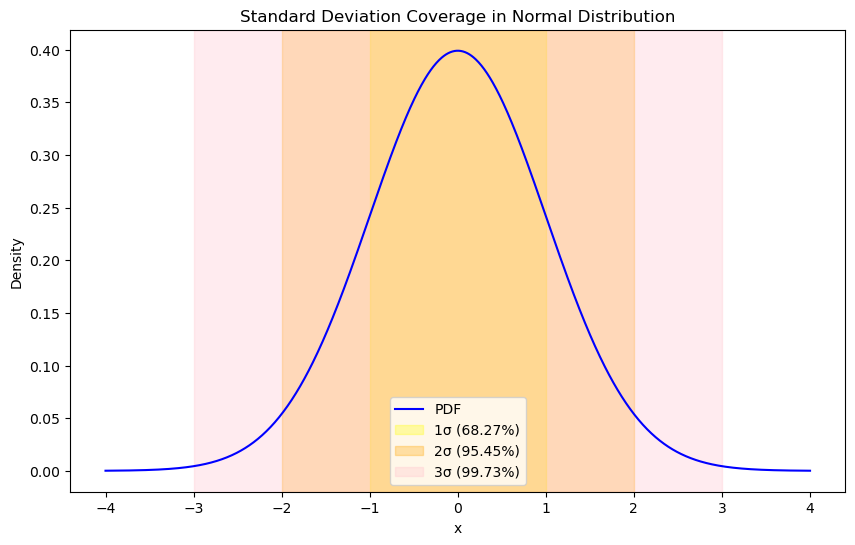

In [7]:
# Visualizing Standard Deviation Coverage
x_sd = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_sd = norm.pdf(x_sd, loc=mu, scale=sigma)
plt.figure(figsize=(10, 6))
plt.plot(x_sd, y_sd, label="PDF", color='blue')
plt.axvspan(mu - sigma, mu + sigma, color='yellow', alpha=0.3, label="1σ (68.27%)")
plt.axvspan(mu - 2*sigma, mu + 2*sigma, color='orange', alpha=0.3, label="2σ (95.45%)")
plt.axvspan(mu - 3*sigma, mu + 3*sigma, color='pink', alpha=0.3, label="3σ (99.73%)")
plt.title("Standard Deviation Coverage in Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

4. **Standard Normal Distribution:**  
   A normal distribution with $\mu = 0$ and $\sigma = 1$, transforming values to **z-scores**:
   $$
   z = \frac{x - \mu}{\sigma}
   $$

### Normal Distribution Analysis on Iris Dataset

The **Iris dataset**, widely used in statistical studies, contains variables such as **sepal width**, which often approximates a normal distribution. Below are analytical questions, including empirical percentage-related ones, to study normal distribution and its properties.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis, skew

# Load the Iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')

# Extract the variable (Sepal Width)
sepal_width = iris['sepal_width']
sepal_width.head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

**Does the distribution of sepal widths follow a normal pattern?**

Mean: 3.06, Median: 3.00, Std Dev: 0.43
Skewness: 0.32 (0 for perfect symmetry)
Kurtosis: 3.18 (3 for normal distribution)
Percentage within 1σ: 67.33% (Expected: 68%)
Percentage within 2σ: 96.67% (Expected: 95%)
Percentage within 3σ: 99.33% (Expected: 99.7%)


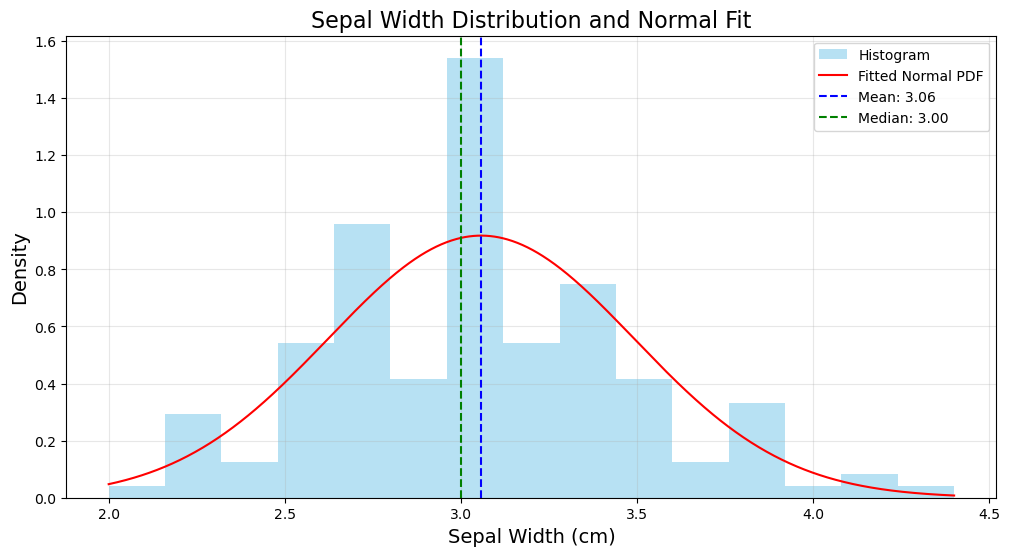

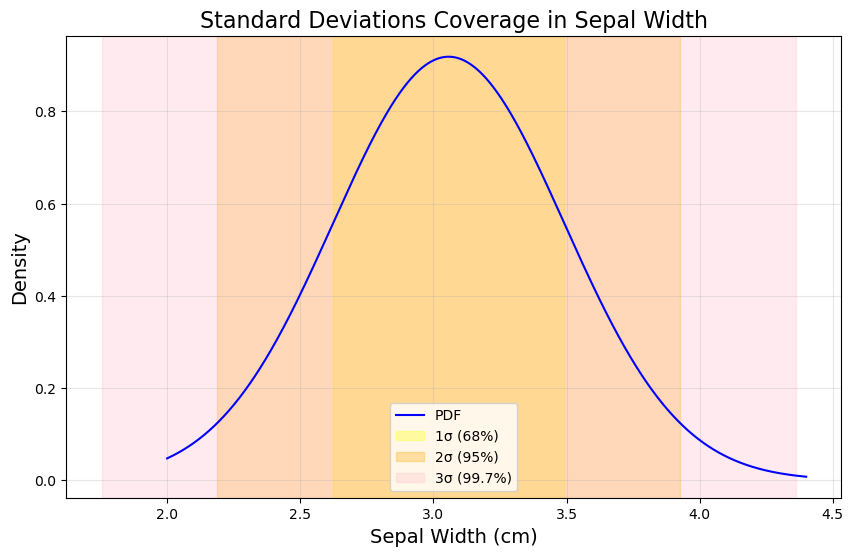

In [9]:
# Calculate Mean, Median, and Standard Deviation
mean = np.mean(sepal_width)
median = np.median(sepal_width)
std_dev = np.std(sepal_width)

# Skewness and Kurtosis
data_skewness = skew(sepal_width)
data_kurtosis = kurtosis(sepal_width, fisher=False)  # Use fisher=False for Pearson's kurtosis

# Empirical Percentages
one_sd = ((sepal_width >= mean - std_dev) & (sepal_width <= mean + std_dev)).sum() / len(sepal_width) * 100
two_sd = ((sepal_width >= mean - 2 * std_dev) & (sepal_width <= mean + 2 * std_dev)).sum() / len(sepal_width) * 100
three_sd = ((sepal_width >= mean - 3 * std_dev) & (sepal_width <= mean + 3 * std_dev)).sum() / len(sepal_width) * 100

# Print Summary
print(f"Mean: {mean:.2f}, Median: {median:.2f}, Std Dev: {std_dev:.2f}")
print(f"Skewness: {data_skewness:.2f} (0 for perfect symmetry)")
print(f"Kurtosis: {data_kurtosis:.2f} (3 for normal distribution)")
print(f"Percentage within 1σ: {one_sd:.2f}% (Expected: 68%)")
print(f"Percentage within 2σ: {two_sd:.2f}% (Expected: 95%)")
print(f"Percentage within 3σ: {three_sd:.2f}% (Expected: 99.7%)")

# Histogram and Normal PDF
x = np.linspace(sepal_width.min(), sepal_width.max(), 1000)
pdf = norm.pdf(x, loc=mean, scale=std_dev)

plt.figure(figsize=(12, 6))
plt.hist(sepal_width, bins=15, density=True, alpha=0.6, color='skyblue', label="Histogram")
plt.plot(x, pdf, label="Fitted Normal PDF", color='red')
plt.title("Sepal Width Distribution and Normal Fit", fontsize=16)
plt.xlabel("Sepal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.axvline(mean, color='blue', linestyle='--', label=f"Mean: {mean:.2f}")
plt.axvline(median, color='green', linestyle='--', label=f"Median: {median:.2f}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Standard Deviation Coverage
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label="PDF", color='blue')
plt.axvspan(mean - std_dev, mean + std_dev, color='yellow', alpha=0.3, label="1σ (68%)")
plt.axvspan(mean - 2 * std_dev, mean + 2 * std_dev, color='orange', alpha=0.3, label="2σ (95%)")
plt.axvspan(mean - 3 * std_dev, mean + 3 * std_dev, color='pink', alpha=0.3, label="3σ (99.7%)")
plt.title("Standard Deviations Coverage in Sepal Width", fontsize=16)
plt.xlabel("Sepal Width (cm)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**What are the mean and variance of the sepal width data?**

In [10]:
# Calculate Mean and Variance
mean = np.mean(sepal_width)
std_dev = np.std(sepal_width)
variance = std_dev ** 2
print(f"\nMean: {mean:.2f}, Variance: {variance:.2f}, Std Dev: {std_dev:.2f}")


Mean: 3.06, Variance: 0.19, Std Dev: 0.43


**What is the probability of observing sepal widths below a specific value (e.g., 3.5 cm)?**

In [11]:
# Probability of Observing Sepal Widths below 3.5 cm (CDF)
threshold = 3.5
cdf_value = norm.cdf(threshold, loc=mean, scale=std_dev)
print(f"\nProbability of sepal width being less than {threshold} cm: {cdf_value:.4f}")


Probability of sepal width being less than 3.5 cm: 0.8459


**What is the cumulative probability of observing sepal widths above a certain value (e.g., 3.5 cm)?**

In [12]:
# Cumulative Probability (CDF)
threshold = 3.5  # Example threshold for cumulative probability
cdf_value = 1 - norm.cdf(threshold, loc=mean, scale=std_dev)
print(f"\nCumulative probability of sepal width above {threshold} cm: {cdf_value:.4f}")


Cumulative probability of sepal width above 3.5 cm: 0.1541


**What value of sepal width corresponds to a specific cumulative probability (e.g., 0.75)?**

In [13]:
# Inverse Cumulative Probability (PPF)
cumulative_prob = 0.75  # Example cumulative probability
ppf_value = norm.ppf(cumulative_prob, loc=mean, scale=std_dev)
print(f"\nSepal width corresponding to cumulative probability {cumulative_prob}: {ppf_value:.4f}")


Sepal width corresponding to cumulative probability 0.75: 3.3503


## Identifying Probability Distributions

#### Discrete Probability Distributions
In discrete probability distributions, the data follows specific characteristics that make it easy to determine the type of distribution it represents. The distribution models events that have distinct, separate outcomes.

**Examples of Discrete Distributions:**
1. **Binomial Distribution**:
   - **Key Characteristic**: Counts the **number of successes** in a fixed number of trials with a binary outcome (e.g., success or failure).
   - **Example**: Flipping a coin multiple times and counting heads.

2. **Poisson Distribution**:
   - **Key Characteristic**: Counts the **number of events** occurring in a fixed interval of time, space, or volume.
   - **Assumptions**: Events are independent, and the rate of occurrence (\(\lambda\)) is constant.
   - **Example**: Number of calls received at a call center per hour.

3. **Multinomial Distribution**:
   - **Key Characteristic**: Generalizes the binomial distribution to **multiple categories**.
   - **Example**: Modeling survey responses across multiple options (e.g., Agree, Neutral, Disagree).

#### **Continuous Probability Distributions**

Unlike discrete distributions, continuous distributions represent data that can take infinitely many values within a specific range. The type of distribution is not strictly tied to a specific characteristic of the data but is instead determined by analyzing its **shape, central tendency, skewness, and kurtosis**.

**Examples of Continuous Distributions:**
1. **Normal Distribution**:
   - **Shape**: Symmetrical bell curve.
   - **Characteristics**:
     - Mean ≈ Median.
     - Skewness ≈ 0 (perfect symmetry).
     - Kurtosis ≈ 3 (Mesokurtic).
   - **Example**: Modeling natural phenomena like heights or test scores.

2. **Exponential Distribution**:
   - **Shape**: Right-skewed curve, starts high and decreases rapidly.
   - **Characteristics**:
     - Skewness = 2 (highly skewed to the right).
     - Kurtosis = 9 (leptokurtic, heavy tails).
   - **Example**: Time between independent events, such as waiting times.

3. **Uniform Distribution**:
   - **Shape**: Flat, rectangular distribution.
   - **Characteristics**:
     - Equal probability for all values within a range.
     - Skewness = 0 (perfect symmetry).
     - Kurtosis = 1.8 (light tails, Platykurtic).
   - **Example**: Generating random numbers between two values.

4. **Log-Normal Distribution**:
   - **Shape**: Right-skewed curve.
   - **Characteristics**:
     - Skewness and kurtosis depend on scale parameters; typically very large.
   - **Example**: Modeling stock prices or financial returns.

5. **Pareto Distribution**:
   - **Shape**: Long right tail, follows a power-law pattern.
   - **Characteristics**:
     - Skewness and kurtosis depend on the shape parameter α.
     - Example with α = 2.5: Skewness ≈ 3.16, Kurtosis ≈ 18 (extremely heavy right tail).
   - **Example**: Wealth distribution, city populations, or size of natural phenomena (e.g., earthquakes).

### **Key Properties of Continuous Distributions**
To determine the best-fit continuous distribution for a dataset, consider the following characteristics:

1. **Shape of the Distribution**:
   - Bell-shaped (Normal).
   - Right-skewed (Exponential, Log-Normal, Pareto).
   - Flat/rectangular (Uniform).

2. **Relationship Between Mean and Median**:
   - Mean ≈ Median: Indicates symmetry, typical of the normal distribution.
   - Mean > Median: Right-skewed, observed in exponential, log-normal, and Pareto distributions.

3. **Skewness**:
   - Measures the **symmetry** of the distribution:
     - **Normal/Uniform**: Skewness ≈ 0.
     - **Exponential/Log-Normal/Pareto**: Positive skew (> 0), right-tailed.

4. **Kurtosis**:
   - Measures the **tailedness** of the distribution:
     - **Normal**: Kurtosis ≈ 3.
     - **Uniform**: Kurtosis ≈ 1.8 (flat).
     - **Exponential/Log-Normal/Pareto**: Leptokurtic (high kurtosis, heavy tails).
   - **Pandas Behavior for Kurtosis**:
     - Pandas calculates **Fisher’s kurtosis**, which subtracts 3. For normal distributions, kurtosis is normalized to **0**, even though the true kurtosis is 3.


In [14]:
import numpy as np
from scipy.stats import norm, expon, uniform, lognorm, pareto

# Parameters for distributions
mean, std = 0, 1  # Normal distribution
scale = 1  # Exponential and Pareto scale parameter
shape = 2.5  # Pareto shape parameter (α)
s = 0.954  # Log-Normal scale parameter

# Skewness and Kurtosis calculations
metrics = {
    "Normal": {
        "Skewness": norm.stats(moments='s'),
        "Kurtosis": norm.stats(moments='k'),
    },
    "Uniform": {
        "Skewness": uniform.stats(moments='s'),
        "Kurtosis": uniform.stats(moments='k'),
    },
    "Exponential": {
        "Skewness": expon.stats(moments='s'),
        "Kurtosis": expon.stats(moments='k'),
    },
    "Log-Normal": {
        "Skewness": lognorm.stats(s, moments='s'),
        "Kurtosis": lognorm.stats(s, moments='k'),
    },
    "Pareto (α=2.5)": {
        "Skewness": pareto.stats(shape, moments='s'),
        "Kurtosis": pareto.stats(shape, moments='k'),
    }
}

# Print Results
for dist, stats in metrics.items():
    print(f"{dist} Distribution:")
    print(f"  Skewness: {stats['Skewness']:.2f}")
    print(f"  Kurtosis: {stats['Kurtosis']:.2f}")
    print()

Normal Distribution:
  Skewness: 0.00
  Kurtosis: 0.00

Uniform Distribution:
  Skewness: 0.00
  Kurtosis: -1.20

Exponential Distribution:
  Skewness: 2.00
  Kurtosis: 6.00

Log-Normal Distribution:
  Skewness: 5.46
  Kurtosis: 81.31

Pareto (α=2.5) Distribution:
  Skewness: nan
  Kurtosis: nan



##Checking Normality

The assumption of **normality** is central to many statistical techniques and machine learning models. Checking whether data follows a normal distribution ensures accurate analysis and better model performance. Here’s why:

1. **Parametric Statistical Techniques**:
   - Techniques like **t-tests**, **ANOVA**, and **linear regression** assume the data or residuals are normally distributed.
   - Non-normal data leads to biased estimates, incorrect confidence intervals, and invalid statistical conclusions.

2. **Machine Learning Algorithms**:
   - Models like **linear regression**, **SVM**, and **Gaussian naive Bayes** expect features to follow a Gaussian distribution.
   - Non-normal features can reduce predictive accuracy and model robustness.

3. **Why Normality Matters?**:
   - Ensures valid interpretation of statistical results.
   - Facilitates optimal performance of certain machine learning algorithms.
   - Simplifies mathematical assumptions that underpin analysis.

### **How to Check Normality?**

#### **Visualizing the Distribution**
Start by visualizing the distribution of the data to observe its shape. Let’s analyze the **`total_bill`** column of the Tips dataset.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
19.78594262295082 8.902411954856856


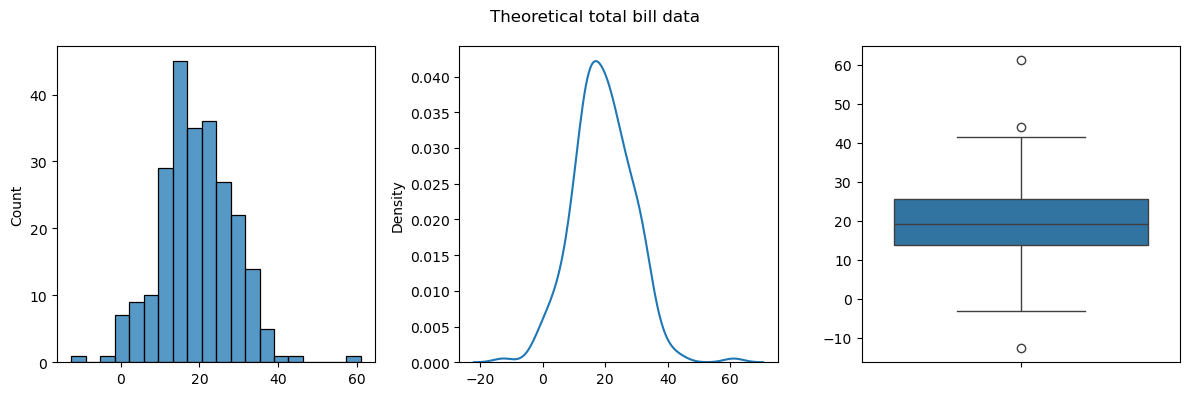

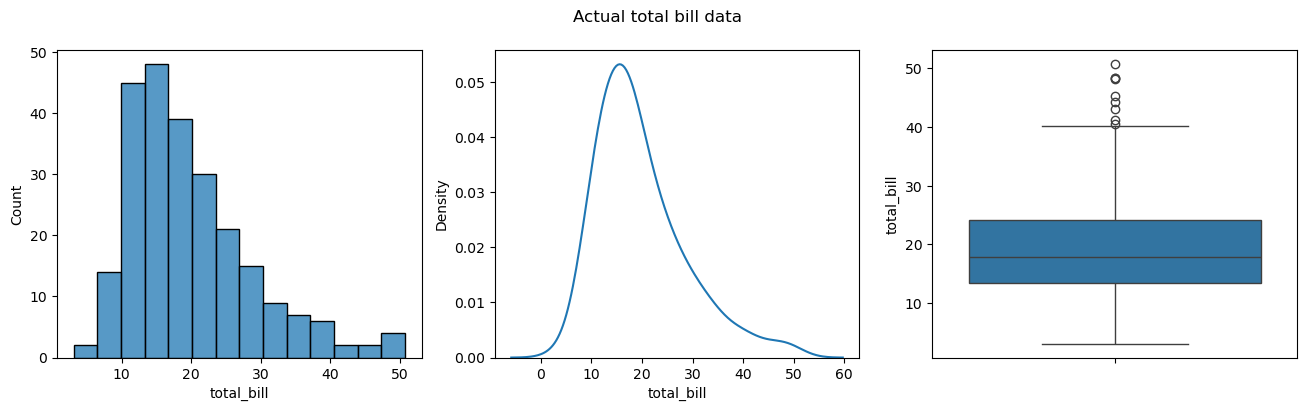

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# Load the Tips dataset
tips = sns.load_dataset('tips')
print(tips.head())

# Mean and Std Dev of 'total_bill'
print(tips['total_bill'].mean(), tips['total_bill'].std())

# Generate a theoretical normal distribution based on mean and std dev of 'total_bill'
total_bill_th = norm.rvs(loc=tips['total_bill'].mean(), scale=tips['total_bill'].std(), size=len(tips))

# Plot Histograms, KDEs, and Boxplots for Theoretical and Actual Data
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
plt.suptitle('Theoretical total bill data')
sns.histplot(total_bill_th, ax=ax[0])
sns.kdeplot(total_bill_th, ax=ax[1])
sns.boxplot(total_bill_th, ax=ax[2])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
plt.suptitle('Actual total bill data')
sns.histplot(data=tips, x='total_bill', ax=ax[0])
sns.kdeplot(data=tips, x='total_bill', ax=ax[1])
sns.boxplot(data=tips, y='total_bill', ax=ax[2])
plt.show()

#### **Verify Normality Using QQ Plot**
Quantile-Quantile (QQ) plots compare the data’s quantiles to those of a theoretical normal distribution.

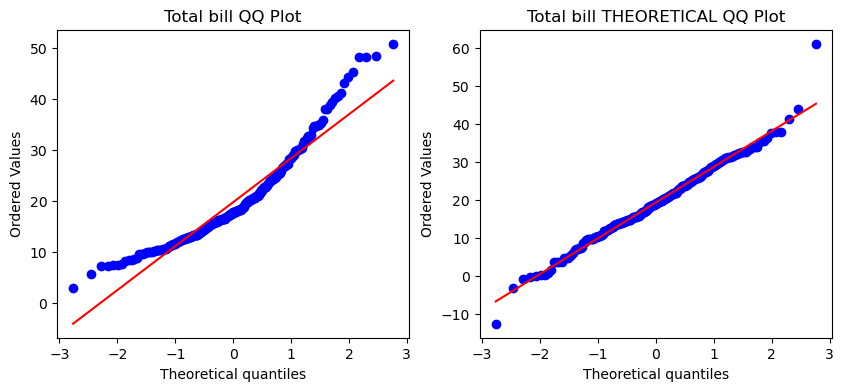

In [16]:
# Verify Normality Using QQ Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot(tips['total_bill'], dist=norm, plot=ax[0])
probplot(total_bill_th, dist=norm, plot=ax[1])
ax[0].set_title('Total bill QQ Plot')
ax[1].set_title('Total bill THEORETICAL QQ Plot')
plt.show()

#### **Assess Skewness and Kurtosis**
Skewness and kurtosis give a deeper insight into the shape of the data:
- **Skewness**: Symmetry of the distribution.  $\text{Skewness} = 0$ for normal.
- **Kurtosis**: Tailedness. $\text{Kurtosis} = 3$ for normal distributions.


## Feature Transformation
Feature transformations are vital for data preprocessing, particularly in statistical analyses and machine learning. Ensuring that data conforms to **normality**—a key assumption in many parametric techniques and machine learning algorithms—enhances performance and interpretability.

1. **Importance for Parametric Techniques**:
   - Statistical tests like **ANOVA**, **linear regression**, and **t-tests** require data or residuals to follow a **normal distribution**.
   - Without normality, estimations could be biased, and statistical conclusions could become unreliable.

2. **Importance for Machine Learning**:
   - Algorithms like **linear regression**, **SVM**, and **Gaussian-based algorithms** function more effectively when features are symmetrically distributed and Gaussian-like.
   - Skewed data may reduce predictive power and compromise model stability.

3. **Advantages of Transformations**:
   - **Normalize Skewed Data**: Reduces skewness and aligns data closer to normality.
   - **Stabilize Variance**: Handles heteroscedasticity (unequal variances across data).
   - **Reduce Outlier Effects**: Mitigates the influence of extreme data points.

1. **Log Transform**:
   - Formula:
     $$
     x' = \log(x)
     $$
   - Ideal for **positively skewed distributions**, where large values disproportionately affect the data.

2. **Box-Cox Transform**:
   - Formula:
     $$
     x' =
     \begin{cases}
     \frac{x^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
     \log(x), & \text{if } \lambda = 0
     \end{cases}
     $$
   - Box-Cox determines the optimal \( \lambda \) parameter that minimizes skewness.
   - Only applicable to **positive data**.

#### **Applying Transformations to the Tips Dataset**

We will perform transformations on the **`total_bill`** and **`tip`** columns in the Tips dataset. Pre- and post-transformation visualizations include **histograms with KDE**, **QQ plots**, and **box plots** to assess the effectiveness of normalization.


Box-Cox Lambda (total_bill): 0.0769
Box-Cox Lambda (tip): -0.0633


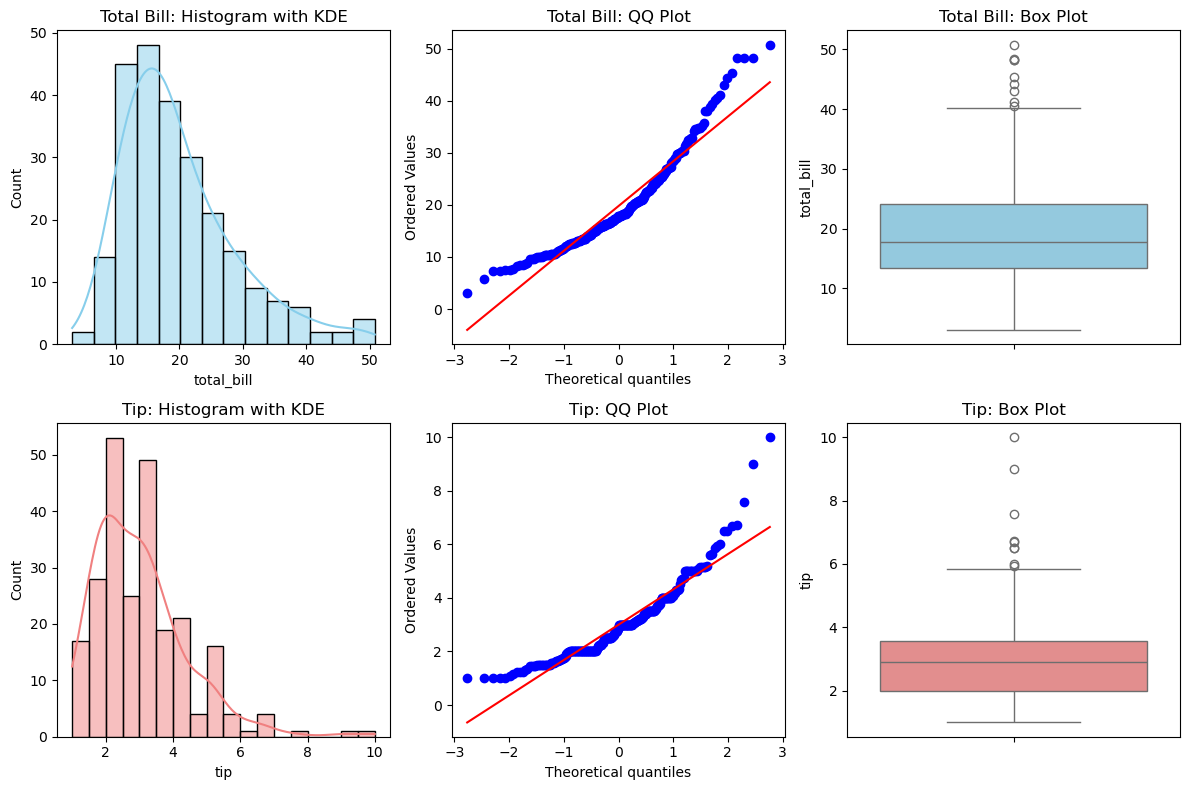

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, probplot

# Load the Tips dataset
tips = sns.load_dataset('tips')

# Columns to analyze
total_bill = tips['total_bill']
tip = tips['tip']

# 1. Log Transform (Adding a small constant to avoid log(0))
log_total_bill = np.log(total_bill + 1e-5)
log_tip = np.log(tip + 1e-5)

# 2. Box-Cox Transform (Requires positive values)
boxcox_total_bill, lambda_total_bill = boxcox(total_bill)
boxcox_tip, lambda_tip = boxcox(tip)

# Print Lambda Values for Box-Cox Transform
print(f"Box-Cox Lambda (total_bill): {lambda_total_bill:.4f}")
print(f"Box-Cox Lambda (tip): {lambda_tip:.4f}")

# Visualizations: Original Data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original Data
sns.histplot(total_bill, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Total Bill: Histogram with KDE')
probplot(total_bill, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Total Bill: QQ Plot')
sns.boxplot(y=total_bill, ax=axes[0, 2], color='skyblue')
axes[0, 2].set_title('Total Bill: Box Plot')

sns.histplot(tip, kde=True, ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Tip: Histogram with KDE')
probplot(tip, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Tip: QQ Plot')
sns.boxplot(y=tip, ax=axes[1, 2], color='lightcoral')
axes[1, 2].set_title('Tip: Box Plot')

plt.tight_layout()
plt.show()

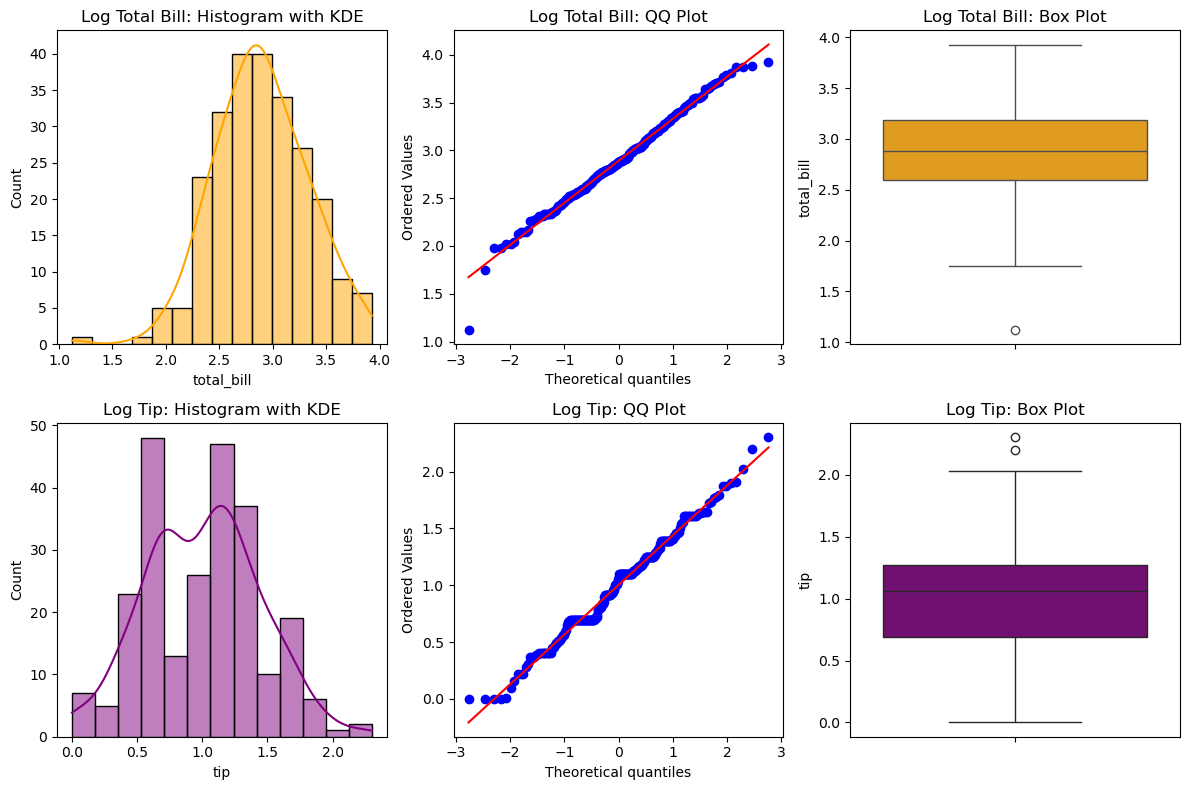

In [18]:
# Visualizations: Log Transformed Data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Log-Transformed Data
sns.histplot(log_total_bill, kde=True, ax=axes[0, 0], color='orange')
axes[0, 0].set_title('Log Total Bill: Histogram with KDE')
probplot(log_total_bill, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Log Total Bill: QQ Plot')
sns.boxplot(y=log_total_bill, ax=axes[0, 2], color='orange')
axes[0, 2].set_title('Log Total Bill: Box Plot')

sns.histplot(log_tip, kde=True, ax=axes[1, 0], color='purple')
axes[1, 0].set_title('Log Tip: Histogram with KDE')
probplot(log_tip, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Log Tip: QQ Plot')
sns.boxplot(y=log_tip, ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Log Tip: Box Plot')

plt.tight_layout()
plt.show()

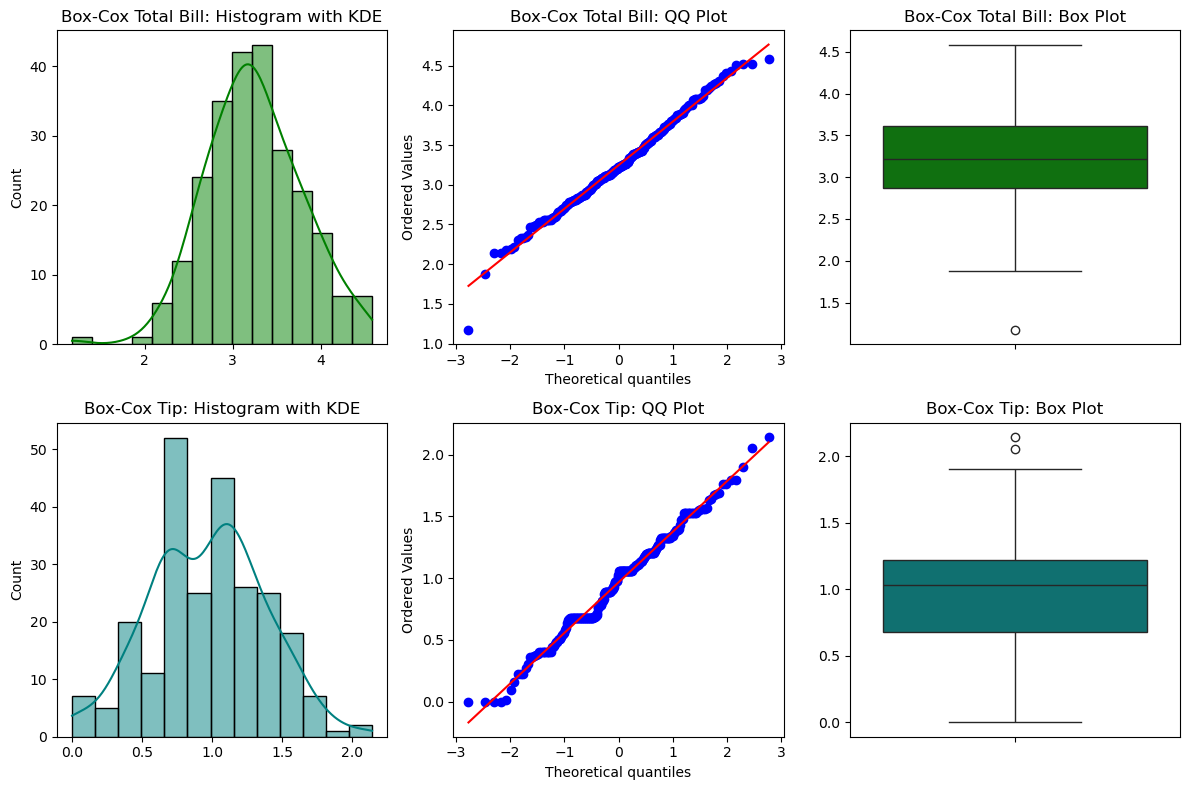

In [19]:
# Visualizations: Boxcox Transformed Data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Box-Cox Transformed Data
sns.histplot(boxcox_total_bill, kde=True, ax=axes[0, 0], color='green')
axes[0, 0].set_title('Box-Cox Total Bill: Histogram with KDE')
probplot(boxcox_total_bill, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Box-Cox Total Bill: QQ Plot')
sns.boxplot(y=boxcox_total_bill, ax=axes[0, 2], color='green')
axes[0, 2].set_title('Box-Cox Total Bill: Box Plot')

sns.histplot(boxcox_tip, kde=True, ax=axes[1, 0], color='teal')
axes[1, 0].set_title('Box-Cox Tip: Histogram with KDE')
probplot(boxcox_tip, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Box-Cox Tip: QQ Plot')
sns.boxplot(y=boxcox_tip, ax=axes[1, 2], color='teal')
axes[1, 2].set_title('Box-Cox Tip: Box Plot')

plt.tight_layout()
plt.show()



#### **Why Transformations Are Necessary**
- Normality is a critical assumption for parametric techniques and some machine learning algorithms.
- Transformations enhance the quality of data by reducing skewness, stabilizing variance, and mitigating outliers.

#### **Log Transform vs. Box-Cox Transform**
- **Log Transform**: Simple and effective for positively skewed data.
- **Box-Cox Transform**: A more flexible option that empirically optimizes the transformation to fit diverse datasets.

By comparing the histograms, QQ plots, and box plots before and after transformation, we can visually confirm the improvements in normality and distribution symmetry.

### **When to Use Transformations?**

Transformations are needed in the following scenarios:
1. **Skewed Data**:
   - Apply log or Box-Cox when data is heavily skewed (e.g., income, transaction amounts).
2. **Stabilizing Variance**:
   - Necessary for resolving issues like heteroscedasticity.
3. **Statistical Assumptions**:
   - Use transformations when parametric methods require normality.
4. **Machine Learning**:
   - To improve algorithm performance in Gaussian-based models.

## Exponential Distribution: Overview

The **exponential distribution** is a continuous probability distribution commonly used to model the time between events in a Poisson process. It is widely applicable in reliability engineering, survival analysis, and queueing theory.

### **Key Characteristics**

1. **Applications**:
   - Models waiting times between occurrences, such as customer arrivals or system failures.
   - Frequently used in processes with constant rates, like radioactive decay.

2. **PDF (Probability Density Function)**:
   - Formula:
   $$f(x; \lambda) = \lambda e^{-\lambda x}, where  x \geq 0$$ and
   $$\lambda > 0$$

3. **CDF (Cumulative Distribution Function)**:
   - Formula: \(F(x; \lambda) = 1 - e^{-\lambda x}\), representing the probability of events occurring within a given time.

4. **Mean and Variance**:
   - Mean: $$\mu = \frac{1}{\lambda}$$
   - Variance: $$\sigma^2 = \frac{1}{\lambda^2}$$

5. **Memoryless Property**:
   - The exponential distribution is **memoryless**, meaning the probability of an event occurring is independent of elapsed time.

---

### **Visualization**

Using Python, we can generate random samples and plot the PDF and CDF to visualize the distribution's behavior. The rate parameter $\lambda$ controls how steep or flat the curves appear, with higher $\lambda$ resulting in shorter intervals between events.



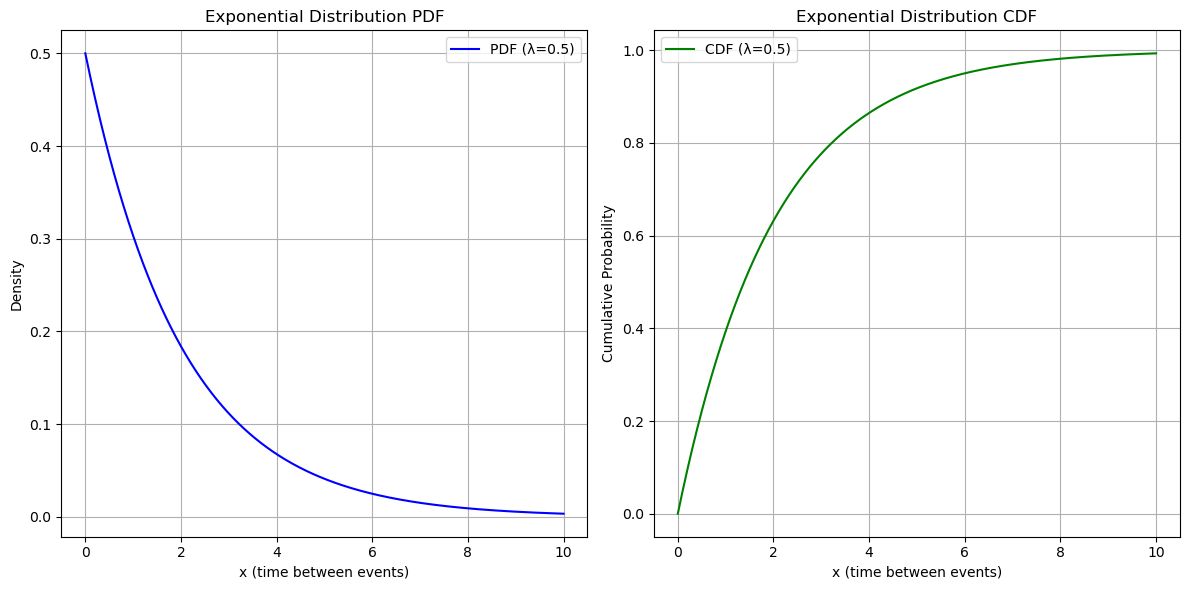

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Parameters
lambda_rate = 0.5  # Example rate parameter (events per unit time)
size = 1000  # Number of samples

# Generate random samples from exponential distribution
data = np.random.exponential(scale=1/lambda_rate, size=size)

# PDF and CDF
x = np.linspace(0, 10, 1000)  # Range of values
pdf = expon.pdf(x, scale=1/lambda_rate)  # PDF
cdf = expon.cdf(x, scale=1/lambda_rate)  # CDF

# Visualizing PDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label=f'PDF (λ={lambda_rate})', color='blue')
plt.title("Exponential Distribution PDF")
plt.xlabel("x (time between events)")
plt.ylabel("Density")
plt.legend()
plt.grid()

# Visualizing CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label=f'CDF (λ={lambda_rate})', color='green')
plt.title("Exponential Distribution CDF")
plt.xlabel("x (time between events)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### **Applications**

1. **Queueing Theory**: Models waiting times for services like call centers.
2. **Reliability Analysis**: Evaluates system or component lifetimes under constant failure rates.
3. **Survival Analysis**: Studies durations until events such as death or system failure.

### Modeling Exponential Distribution

Let’s consider a real-time dataset where **time between events** follows an exponential distribution. For instance, we can simulate data for **time between arrivals at a customer service desk** or **inter-arrival times in a call center** using an exponential distribution.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Step 1: Simulate Data for Time Between Arrivals
rate = 0.2  # Average rate (lambda), e.g., 0.2 arrivals per minute
scale = 1 / rate  # Scale is the inverse of the rate
size = 1000  # Number of observations (e.g., 1000 arrivals)
inter_arrival_times = np.random.exponential(scale=scale, size=size)

# Step 2: Analyze the Dataset
mean = np.mean(inter_arrival_times)
variance = np.var(inter_arrival_times)

1. **What is the average time between arrivals (mean) and its variance?**

In [22]:
# Question 1: Average time between arrivals (mean) and variance
print(f"Mean Time Between Arrivals: {mean:.2f} minutes")
print(f"Variance of Time Between Arrivals: {variance:.2f} minutes^2")

Mean Time Between Arrivals: 4.83 minutes
Variance of Time Between Arrivals: 22.29 minutes^2


2. **What is the probability that the next arrival occurs within a specific time frame (e.g., within 5 minutes)?**

In [23]:
# Question 2: Probability that the next arrival occurs within 5 minutes
prob_within_5 = expon.cdf(5, scale=scale)
print(f"Probability that the next arrival occurs within 5 minutes: {prob_within_5:.2f}")

Probability that the next arrival occurs within 5 minutes: 0.63


3. **What is the probability that the time between arrivals exceeds a threshold (e.g., more than 10 minutes)?**

In [24]:
# Question 3: Probability that the time between arrivals exceeds 10 minutes
prob_exceeds_10 = 1 - expon.cdf(10, scale=scale)
print(f"Probability that the time between arrivals exceeds 10 minutes: {prob_exceeds_10:.2f}")

Probability that the time between arrivals exceeds 10 minutes: 0.14


4. **What is the expected proportion of arrivals within specific time intervals?**

In [25]:
# Question 4: Proportion of arrivals within specific intervals
intervals = [2, 4, 6, 8, 10]
proportions = [expon.cdf(i, scale=scale) - expon.cdf(i-2, scale=scale) for i in intervals]
for i, p in zip(intervals, proportions):
    print(f"Proportion of arrivals between {i-2} and {i} minutes: {p:.2f}")

Proportion of arrivals between 0 and 2 minutes: 0.33
Proportion of arrivals between 2 and 4 minutes: 0.22
Proportion of arrivals between 4 and 6 minutes: 0.15
Proportion of arrivals between 6 and 8 minutes: 0.10
Proportion of arrivals between 8 and 10 minutes: 0.07


5. **How does the shape of the distribution look, and is it consistent with an exponential distribution?**

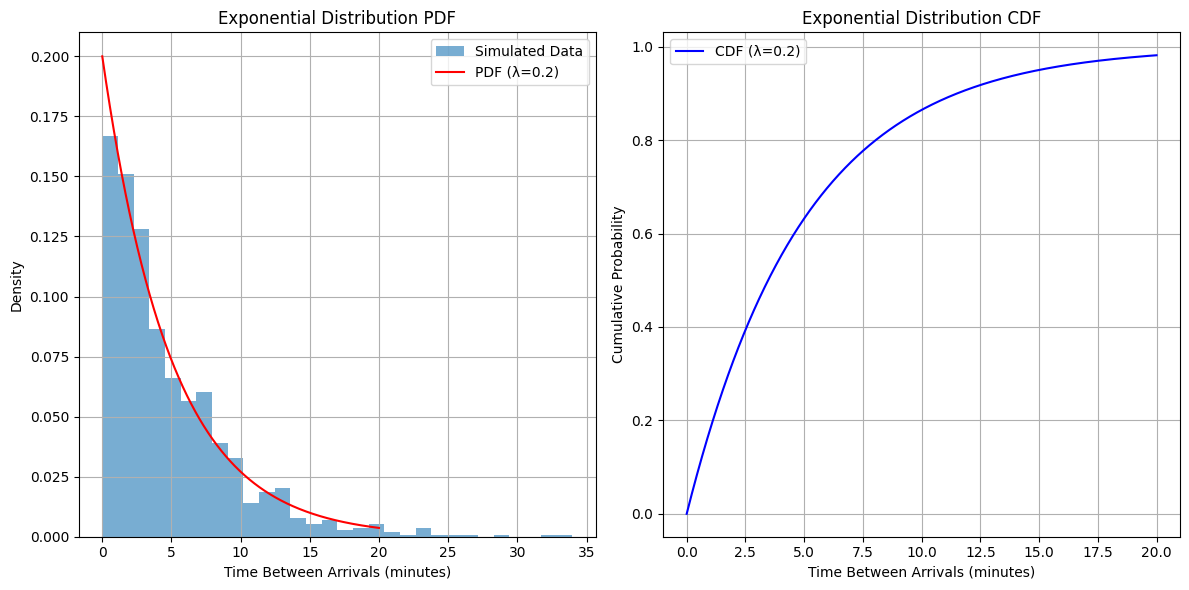

In [ ]:
# Visualization: Question 5
x = np.linspace(0, 20, 1000)
pdf = expon.pdf(x, scale=scale)
cdf = expon.cdf(x, scale=scale)

# Plot PDF and CDF
plt.figure(figsize=(12, 6))

# PDF
plt.subplot(1, 2, 1)
plt.hist(inter_arrival_times, bins=30, density=True, alpha=0.6, label='Simulated Data')
plt.plot(x, pdf, label=f'PDF (λ={rate})', color='red')
plt.title("Exponential Distribution PDF")
plt.xlabel("Time Between Arrivals (minutes)")
plt.ylabel("Density")
plt.legend()
plt.grid()

# CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label=f'CDF (λ={rate})', color='blue')
plt.title("Exponential Distribution CDF")
plt.xlabel("Time Between Arrivals (minutes)")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Transform an exponential distribution into a normal distribution using **feature transformations**.

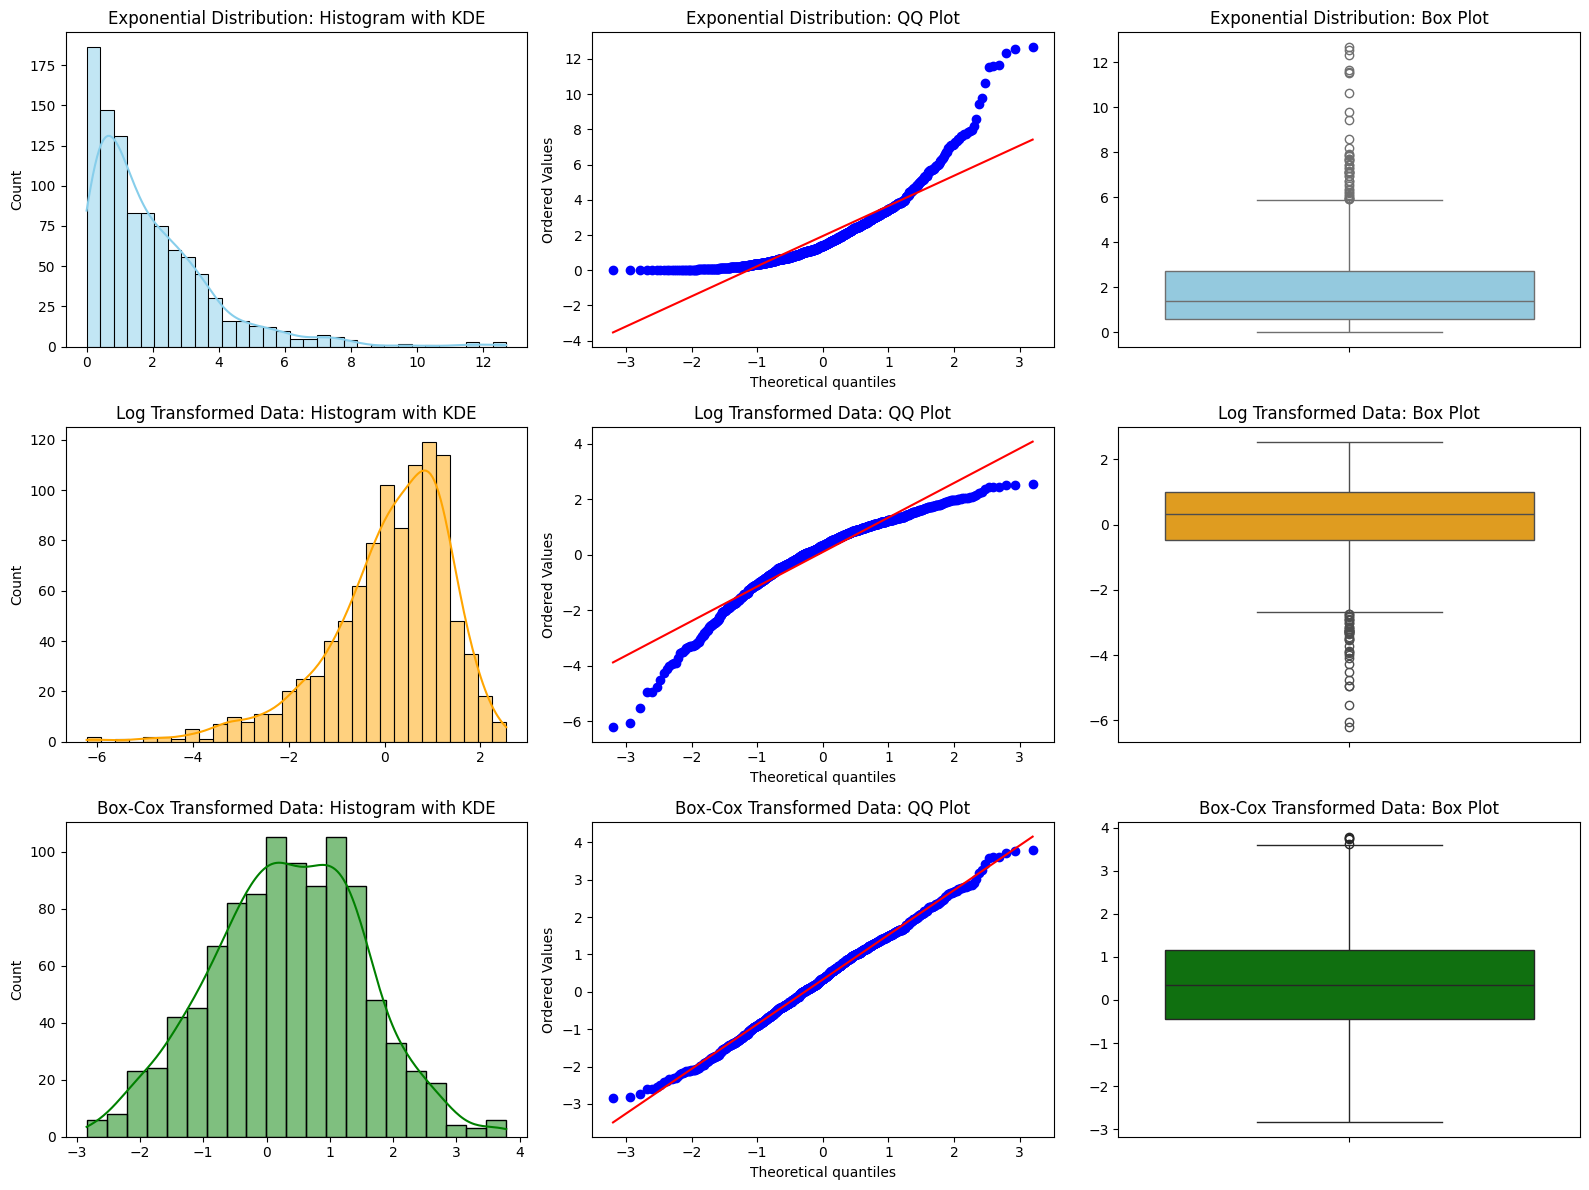

Box-Cox Lambda Value: 0.2959


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, probplot

# Step 1: Generate Exponential Distribution
lambda_rate = 0.5  # Rate parameter (λ)
scale = 1 / lambda_rate  # Scale parameter
size = 1000  # Number of samples
data_exponential = np.random.exponential(scale=scale, size=size)

# Step 2: Log Transform (Reducing Skewness)
log_transformed_data = np.log(data_exponential)

# Step 3: Box-Cox Transform (Optimized Normalization)
boxcox_transformed_data, lambda_boxcox = boxcox(data_exponential)

# Step 4: Visualizations - Histogram with KDE, QQ Plot, and Box Plot
fig, axes = plt.subplots(3, 3, figsize=(16, 12))

# Original Exponential Distribution
sns.histplot(data_exponential, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Exponential Distribution: Histogram with KDE")
probplot(data_exponential, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Exponential Distribution: QQ Plot")
sns.boxplot(data_exponential, ax=axes[0, 2], color='skyblue')
axes[0, 2].set_title("Exponential Distribution: Box Plot")

# Log Transformed Distribution
sns.histplot(log_transformed_data, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Log Transformed Data: Histogram with KDE")
probplot(log_transformed_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Log Transformed Data: QQ Plot")
sns.boxplot(log_transformed_data, ax=axes[1, 2], color='orange')
axes[1, 2].set_title("Log Transformed Data: Box Plot")

# Box-Cox Transformed Distribution
sns.histplot(boxcox_transformed_data, kde=True, ax=axes[2, 0], color='green')
axes[2, 0].set_title("Box-Cox Transformed Data: Histogram with KDE")
probplot(boxcox_transformed_data, dist="norm", plot=axes[2, 1])
axes[2, 1].set_title("Box-Cox Transformed Data: QQ Plot")
sns.boxplot(boxcox_transformed_data, ax=axes[2, 2], color='green')
axes[2, 2].set_title("Box-Cox Transformed Data: Box Plot")

plt.tight_layout()
plt.show()

# Step 5: Print Box-Cox Lambda Value
print(f"Box-Cox Lambda Value: {lambda_boxcox:.4f}")

**Log Transform**:
   - Reduces skewness effectively but may not fully normalize the data.
   - Works well as a quick solution for positive skewness.

**Box-Cox Transform**:
   - Optimally adjusts the distribution to resemble a normal distribution.
   - Achieves near-perfect symmetry, making it suitable for statistical methods requiring normality.

## Lognormal Distribution
The **lognormal distribution** is a continuous probability distribution where the logarithm of the variable is normally distributed. If $ Y = \log(X) $ follows a normal distribution, then X is lognormally distributed.

#### **Characteristics**
1. **PDF (Probability Density Function)**:
   $$
   f(x; \mu, \sigma) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln(x) - \mu)^2}{2\sigma^2}\right), \quad x > 0
   $$

2. **Properties**:
   - Always **positively skewed**.
   - Values are strictly positive.
   - Mean:
   $$E[X] = \exp\left(\mu + \frac{\sigma^2}{2}\right)$$
   - Variance:
   $$ Var[X] = \left(\exp(\sigma^2) - 1\right) \exp\left(2\mu + \sigma^2\right) $$

3. **Applications**:
   - **Finance**: Stock prices and returns.
   - **Engineering**: Lifespan analysis.
   - **Environmental studies**: Modeling pollutant concentrations.
   - **Biology**: Growth rates and distributions.

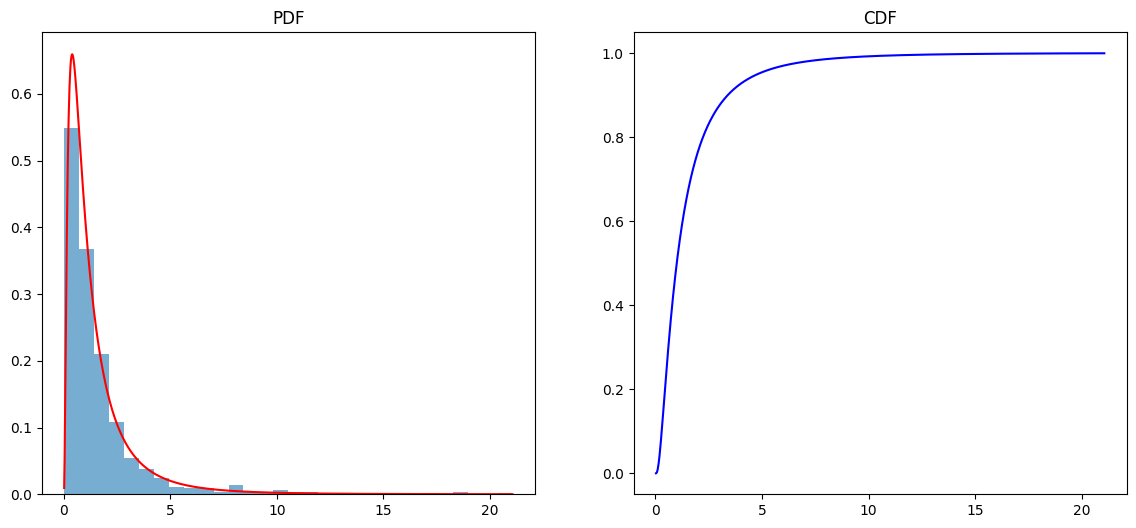

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

mu, sigma = 0, 0.954
scale = np.exp(mu)
samples = lognorm.rvs(sigma, scale=scale, size=1000)

x = np.linspace(min(samples), max(samples), 1000)
pdf = lognorm.pdf(x, s=sigma, scale=scale)
cdf = lognorm.cdf(x, s=sigma, scale=scale)

# Plot PDF and CDF
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(samples, bins=30, density=True, alpha=0.6, label="Samples")
plt.plot(x, pdf, label="PDF", color="red")
plt.title("PDF")
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="CDF", color="blue")
plt.title("CDF")
plt.show()

### Lognormal Distribution Analysis

Let's consider a real-world scenario where the data follows a **lognormal distribution**. For example, this might be income data (as income distributions are often positively skewed), or stock prices, which grow multiplicatively over time.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, probplot

# Simulating a lognormal dataset
mu, sigma = 3, 0.7  # Mean and standard deviation of the underlying normal distribution
scale = np.exp(mu)  # Scale parameter (e^mu)
size = 1000  # Sample size
data_lognormal = lognorm.rvs(sigma, scale=scale, size=size)

1. **What are the key statistics (mean, variance, skewness, kurtosis) of the lognormal data?**

In [ ]:
# Question 1: Key Statistics
mean = np.mean(data_lognormal)
variance = np.var(data_lognormal)
skewness = lognorm.stats(sigma, scale=scale, moments='s')
kurtosis = lognorm.stats(sigma, scale=scale, moments='k')
print(f"Mean: {mean:.2f}, Variance: {variance:.2f}")
print(f"Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f}")

Mean: 25.22, Variance: 406.57
Skewness: 2.89, Kurtosis: 17.79


2. **What is the probability of observing a value below a certain threshold (e.g., income below $50,000)?**

In [ ]:
# Question 2: Probability of observing value below a threshold (e.g., $50,000)
threshold = 50000
prob_below_threshold = lognorm.cdf(threshold, sigma, scale=scale)
print(f"Probability of observing value below ${threshold}: {prob_below_threshold:.4f}")

Probability of observing value below $50000: 1.0000


3. **What is the probability of observing a value above a threshold (e.g., stock price above $1,000)?**

In [ ]:
# Question 3: Probability of observing value above a threshold (e.g., $1,000)
threshold_high = 1000
prob_above_threshold = 1 - lognorm.cdf(threshold_high, sigma, scale=scale)
print(f"Probability of observing value above ${threshold_high}: {prob_above_threshold:.4f}")

Probability of observing value above $1000: 0.0000


4. **What is the range of values (confidence interval) within which a specific percentage of the data falls (e.g., middle 95%)?**

In [ ]:
# Question 4: Confidence Interval (Middle 95%)
ci_lower = lognorm.ppf(0.025, sigma, scale=scale)
ci_upper = lognorm.ppf(0.975, sigma, scale=scale)
print(f"95% Confidence Interval: ${ci_lower:.2f} to ${ci_upper:.2f}")

95% Confidence Interval: $5.09 to $79.20


5. **How does the histogram and fitted PDF compare for the given lognormal data?**

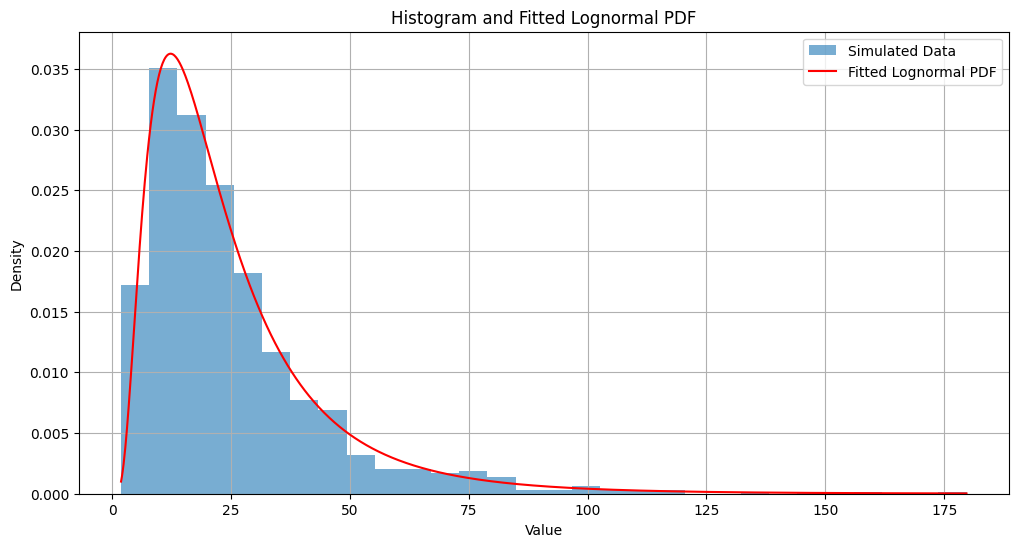

In [ ]:
# Question 5: Histogram and Fitted PDF
x = np.linspace(min(data_lognormal), max(data_lognormal), 1000)
pdf = lognorm.pdf(x, sigma, scale=scale)

plt.figure(figsize=(12, 6))
plt.hist(data_lognormal, bins=30, density=True, alpha=0.6, label="Simulated Data")
plt.plot(x, pdf, label="Fitted Lognormal PDF", color="red")
plt.title("Histogram and Fitted Lognormal PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

6. **Is the data well-aligned with a lognormal distribution based on visual inspection (QQ plot)?**

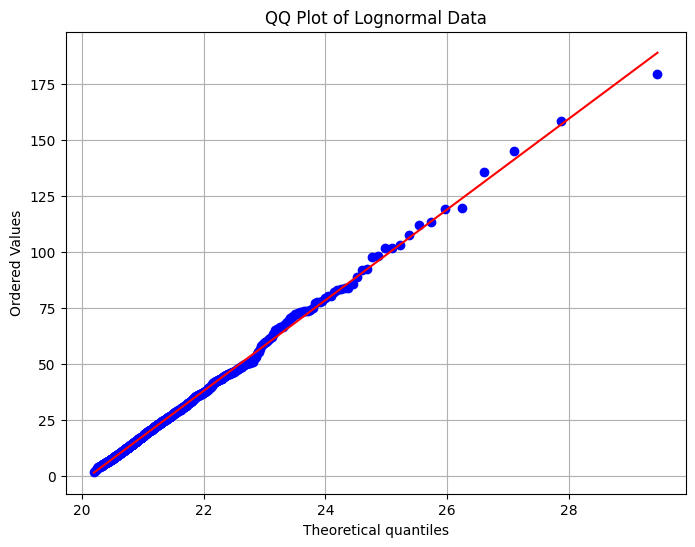

In [ ]:
# Question 6: QQ Plot for Lognormal Data
plt.figure(figsize=(8, 6))
probplot(data_lognormal, dist="lognorm", sparams=(sigma, scale), plot=plt)
plt.title("QQ Plot of Lognormal Data")
plt.grid()
plt.show()

### Transforming Lognormal Distribution to Normal Distribution

Lognormal distributions are positively skewed because their logarithms follow a **normal distribution**. To transform lognormal data into normal data, applying the **log transform** directly allows us to bring the data closer to symmetry and normalize its distribution.

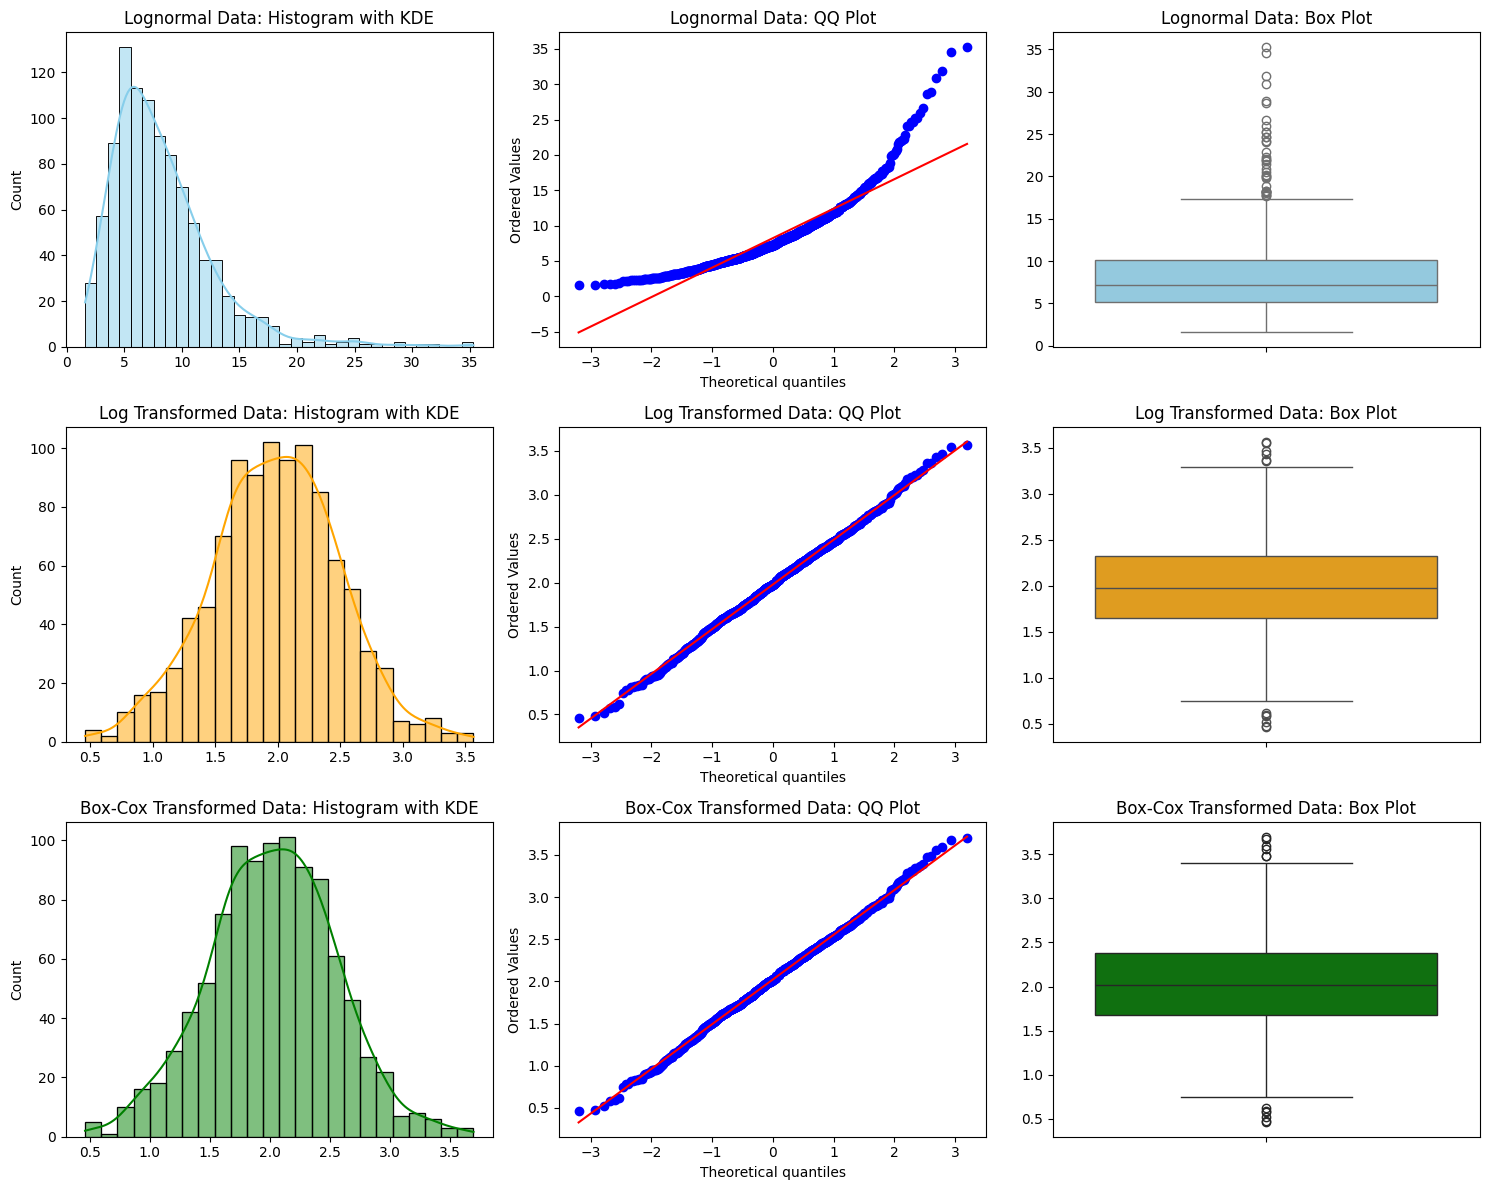

Box-Cox Transformation Lambda: 0.0205


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm, boxcox, probplot

# Step 1: Generate Lognormal Data
mu, sigma = 2, 0.5  # Parameters for the underlying normal distribution
scale = np.exp(mu)  # Scale parameter for lognormal distribution
size = 1000  # Number of samples
data_lognormal = lognorm.rvs(s=sigma, scale=scale, size=size)

# Step 2: Logarithmic Transformation
log_transformed_data = np.log(data_lognormal)

# Step 3: Box-Cox Transformation
# Box-Cox requires positive data, so we use the lognormal data directly
boxcox_transformed_data, lambda_boxcox = boxcox(data_lognormal)

# Step 4: Visualize Original and Transformed Data
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Original Lognormal Data
sns.histplot(data_lognormal, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Lognormal Data: Histogram with KDE")
probplot(data_lognormal, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Lognormal Data: QQ Plot")
sns.boxplot(data=data_lognormal, ax=axes[0, 2], color='skyblue')
axes[0, 2].set_title("Lognormal Data: Box Plot")

# Log Transformed Data
sns.histplot(log_transformed_data, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Log Transformed Data: Histogram with KDE")
probplot(log_transformed_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Log Transformed Data: QQ Plot")
sns.boxplot(data=log_transformed_data, ax=axes[1, 2], color='orange')
axes[1, 2].set_title("Log Transformed Data: Box Plot")

# Box-Cox Transformed Data
sns.histplot(boxcox_transformed_data, kde=True, ax=axes[2, 0], color='green')
axes[2, 0].set_title("Box-Cox Transformed Data: Histogram with KDE")
probplot(boxcox_transformed_data, dist="norm", plot=axes[2, 1])
axes[2, 1].set_title("Box-Cox Transformed Data: QQ Plot")
sns.boxplot(data=boxcox_transformed_data, ax=axes[2, 2], color='green')
axes[2, 2].set_title("Box-Cox Transformed Data: Box Plot")

plt.tight_layout()
plt.show()

# Step 5: Print Lambda for Box-Cox
print(f"Box-Cox Transformation Lambda: {lambda_boxcox:.4f}")

## Pareto (Power Law) Distribution
The **Pareto distribution**, or **power-law distribution**, models phenomena where a small percentage of causes account for a large percentage of effects (e.g., wealth distribution). It has a **long right tail**, emphasizing the probability of extreme events.

#### **Key Properties**
1. **PDF**:
$$f(x; x_m, \alpha) = \frac{\alpha x_m^\alpha}{x^{\alpha+1}}, \, x \geq x_m$$
2. **CDF**:
$$F(x; x_m, \alpha) = 1 - \left(\frac{x_m}{x}\right)^\alpha, \, x \geq x_m\$$
3. **Fat Tails**: Models rare, impactful events like natural disasters or extreme wealth.

#### **Applications**
- **Economics**: Wealth and income distributions.
- **Natural Phenomena**: Earthquake magnitudes, city sizes.
- **Network Science**: Internet traffic, file sizes.
- **Business**: Customer behavior and sales patterns.

#### **Insights**
- **PDF**: Highlights a steep curve near the minimum value with a long tail.
- **CDF**: Shows cumulative probabilities, approaching 1 as \(x\) grows.
- **Shape Parameter ($\alpha$)**: Lower $\alpha$ increases skewness and tail thickness, amplifying extreme events.

The Pareto distribution is ideal for modeling **skewed, scale-invariant data** where outliers have significant influence.

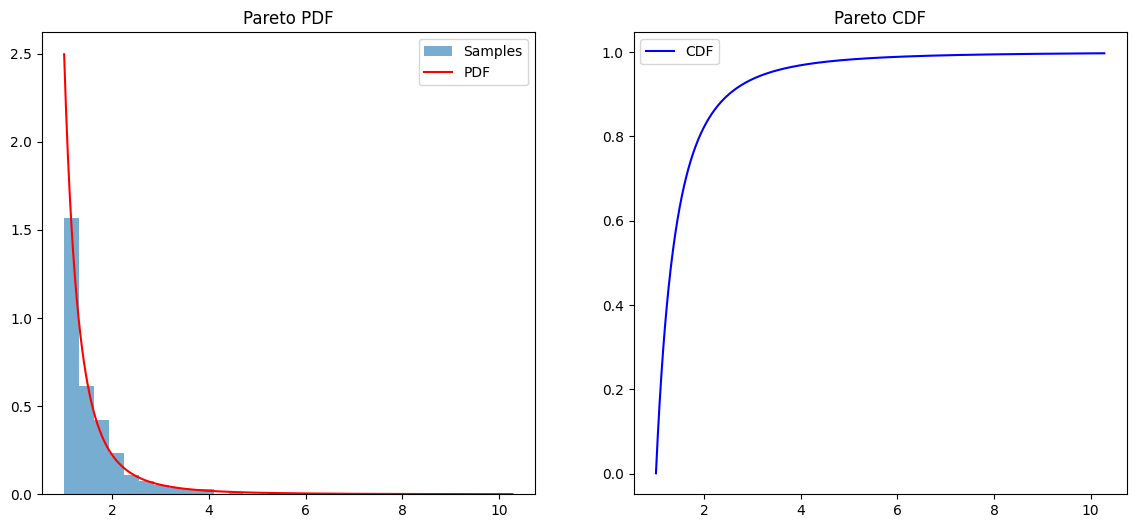

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

alpha, x_m, size = 2.5, 1, 1000
data = pareto.rvs(alpha, scale=x_m, size=size)

x = np.linspace(min(data), max(data), 1000)
pdf = pareto.pdf(x, alpha, scale=x_m)
cdf = pareto.cdf(x, alpha, scale=x_m)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, label="Samples")
plt.plot(x, pdf, label="PDF", color="red")
plt.title("Pareto PDF")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="CDF", color="blue")
plt.title("Pareto CDF")
plt.legend()
plt.show()

### Pareto Distribution Analysis

Let’s consider a real-world dataset, such as **wealth distribution among individuals** or **file sizes on a server**, that follows a **Pareto distribution**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto, probplot

# Parameters
alpha = 2.5  # Shape parameter (α)
x_m = 1  # Minimum value (scale parameter)
size = 1000  # Sample size

# Generate Pareto data
data_pareto = pareto.rvs(alpha, scale=x_m, size=size)

1. **What are the key descriptive statistics (mean, variance, etc.) for the dataset?**

In [ ]:
# Question 1: Key Descriptive Statistics
mean = np.mean(data_pareto)
variance = np.var(data_pareto)
skewness = pareto.stats(alpha, moments='s')
kurtosis = pareto.stats(alpha, moments='k')
print(f"Mean: {mean:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

Mean: 1.62
Variance: 0.80
Skewness: nan
Kurtosis: nan


2. **What is the probability of an observation exceeding a certain threshold (e.g., wealth above $1M)?**

In [ ]:
# Question 2: Probability of an observation exceeding a threshold
threshold = 10  # Example threshold
prob_exceed = 1 - pareto.cdf(threshold, alpha, scale=x_m)
print(f"Probability of observation > {threshold}: {prob_exceed:.4f}")

Probability of observation > 10: 0.0032


3. **What is the probability of an observation falling within a certain range (e.g., file sizes between 1 GB and 5 GB)?**

In [ ]:
# Question 3: Probability of observation within a range
lower_bound, upper_bound = 5, 10
prob_within_range = pareto.cdf(upper_bound, alpha, scale=x_m) - pareto.cdf(lower_bound, alpha, scale=x_m)
print(f"Probability of observation within range [{lower_bound}, {upper_bound}]: {prob_within_range:.4f}")

Probability of observation within range [5, 10]: 0.0147


4. **What is the range of values (confidence interval) within which a certain percentage of data falls (e.g., middle 80%)?**

In [ ]:
# Question 4: Confidence Interval for Middle 80% of Data
ci_lower = pareto.ppf(0.1, alpha, scale=x_m)
ci_upper = pareto.ppf(0.9, alpha, scale=x_m)
print(f"80% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")

80% Confidence Interval: [1.04, 2.51]


5. **How does the histogram align with the fitted Pareto PDF and CDF?**

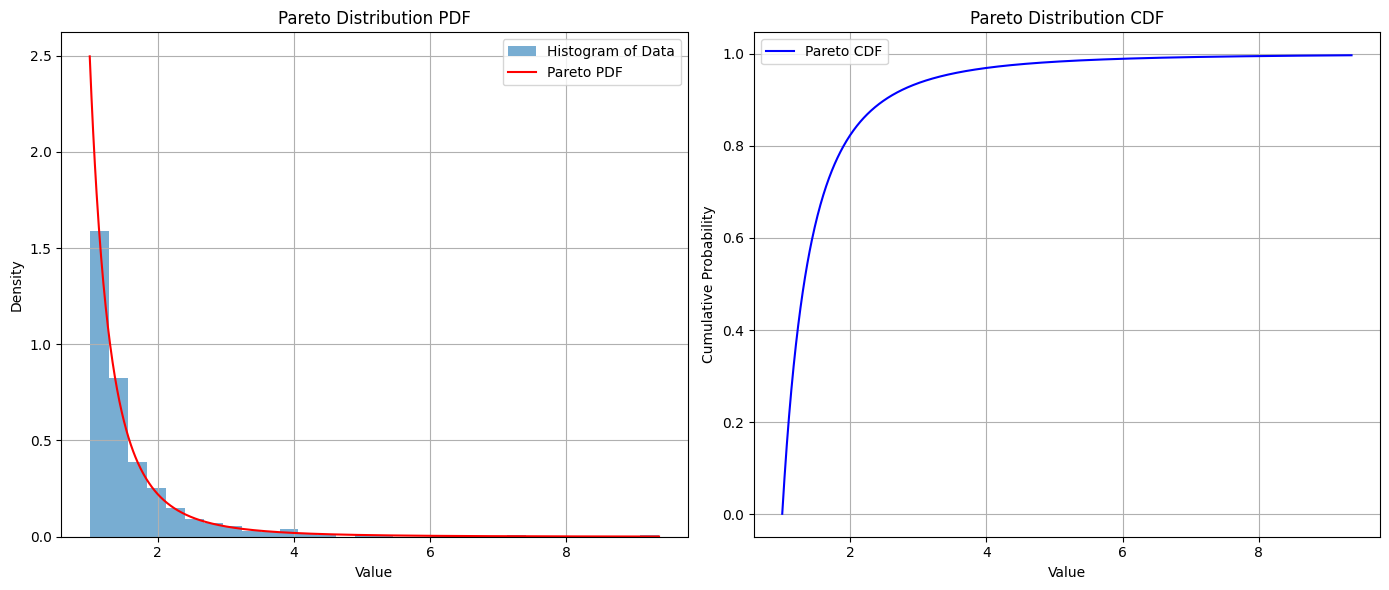

In [ ]:
# Question 5: Histogram, PDF, and CDF
x = np.linspace(min(data_pareto), max(data_pareto), 1000)
pdf = pareto.pdf(x, alpha, scale=x_m)
cdf = pareto.cdf(x, alpha, scale=x_m)

plt.figure(figsize=(14, 6))

# PDF plot
plt.subplot(1, 2, 1)
plt.hist(data_pareto, bins=30, density=True, alpha=0.6, label="Histogram of Data")
plt.plot(x, pdf, label="Pareto PDF", color="red")
plt.title("Pareto Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()

# CDF plot
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label="Pareto CDF", color="blue")
plt.title("Pareto Distribution CDF")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


6. **Is the dataset consistent with a Pareto distribution? (Check alignment using QQ plot).**

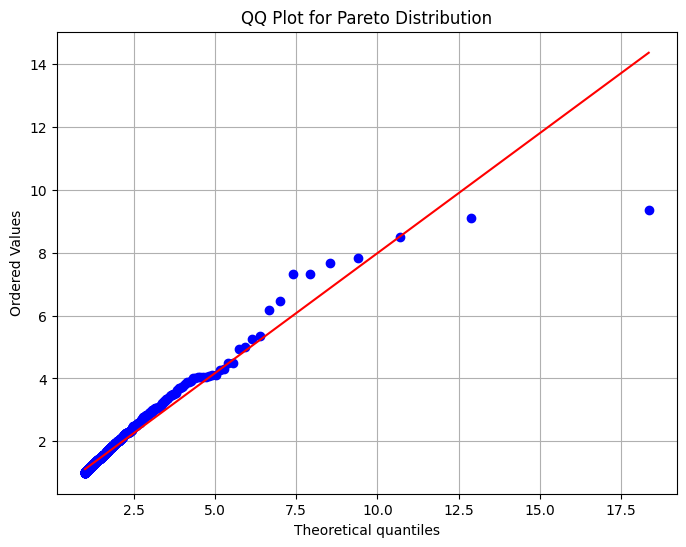

In [ ]:
# Question 6: QQ Plot
plt.figure(figsize=(8, 6))
probplot(data_pareto, dist="pareto", sparams=(alpha,), plot=plt)
plt.title("QQ Plot for Pareto Distribution")
plt.grid()
plt.show()

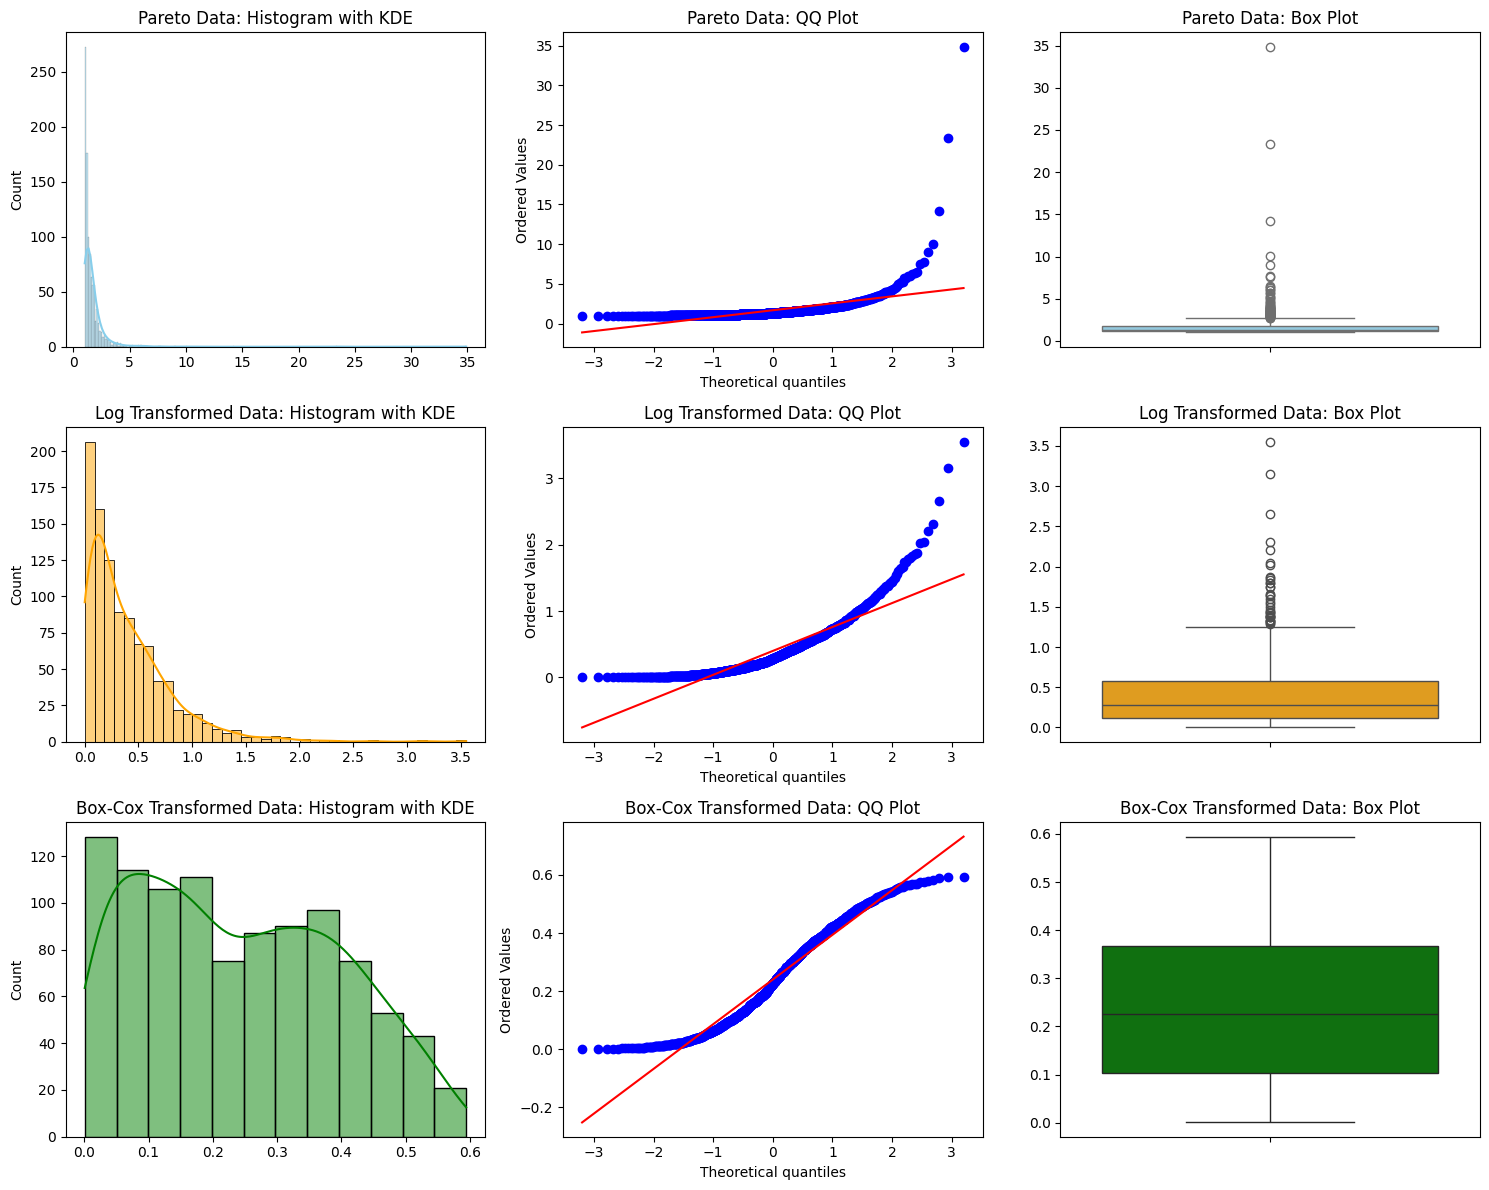

Box-Cox Transformation Lambda: -1.6784


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pareto, boxcox, probplot

# Step 1: Generate Pareto Distribution Data
alpha = 2.5  # Shape parameter
x_m = 1  # Scale parameter (minimum value)
size = 1000  # Number of samples
data_pareto = pareto.rvs(alpha, scale=x_m, size=size)

# Step 2: Log Transform Pareto Data
log_transformed_data = np.log(data_pareto)

# Step 3: Box-Cox Transform Pareto Data
# Ensure data is positive (Pareto distribution data already satisfies this)
boxcox_transformed_data, lambda_boxcox = boxcox(data_pareto)

# Step 4: Visualize the Original and Transformed Data
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Original Pareto Distribution
sns.histplot(data_pareto, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Pareto Data: Histogram with KDE")
probplot(data_pareto, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title("Pareto Data: QQ Plot")
sns.boxplot(data=data_pareto, ax=axes[0, 2], color='skyblue')
axes[0, 2].set_title("Pareto Data: Box Plot")

# Log Transformed Data
sns.histplot(log_transformed_data, kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Log Transformed Data: Histogram with KDE")
probplot(log_transformed_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Log Transformed Data: QQ Plot")
sns.boxplot(data=log_transformed_data, ax=axes[1, 2], color='orange')
axes[1, 2].set_title("Log Transformed Data: Box Plot")

# Box-Cox Transformed Data
sns.histplot(boxcox_transformed_data, kde=True, ax=axes[2, 0], color='green')
axes[2, 0].set_title("Box-Cox Transformed Data: Histogram with KDE")
probplot(boxcox_transformed_data, dist="norm", plot=axes[2, 1])
axes[2, 1].set_title("Box-Cox Transformed Data: QQ Plot")
sns.boxplot(data=boxcox_transformed_data, ax=axes[2, 2], color='green')
axes[2, 2].set_title("Box-Cox Transformed Data: Box Plot")

plt.tight_layout()
plt.show()

# Step 5: Print Box-Cox Lambda Value
print(f"Box-Cox Transformation Lambda: {lambda_boxcox:.4f}")

## Feature scaling

Feature scaling is a technique to adjust the scale of variables (features) in a dataset so they share a common scale. This ensures no feature dominates others due to differences in range or magnitude. It’s an essential preprocessing step, especially for algorithms sensitive to feature magnitudes. This is important because:
1. **Equal Contribution**: Variables with larger ranges can dominate statistical models, making it hard to interpret relationships accurately.
2. **Standardization**: Techniques like z-score standardization (mean = 0, standard deviation = 1) ensure data is centered, allowing meaningful comparisons between variables.
3. **Visualization**: Scaling aids in creating plots like histograms, scatter plots, and regression lines, where unscaled data could distort patterns.

For instance, in multivariate analyses like Principal Component Analysis (PCA), scaling ensures that all variables contribute equally to the variance computation, irrespective of their original magnitudes.


### **Scaling Techniques**
- **Z-Score Scaling (Standardization)**: Centers data around mean = 0, standard deviation = 1.  
  - Formula: $$z = \frac{X - \mu}{\sigma}$$  
  - Use Case: PCA, distance-based models.
- **Min-Max Scaling**: Maps data to a fixed range [0,1].  
  - Formula: $$X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$  
  - Use Case: Neural Networks, clustering.

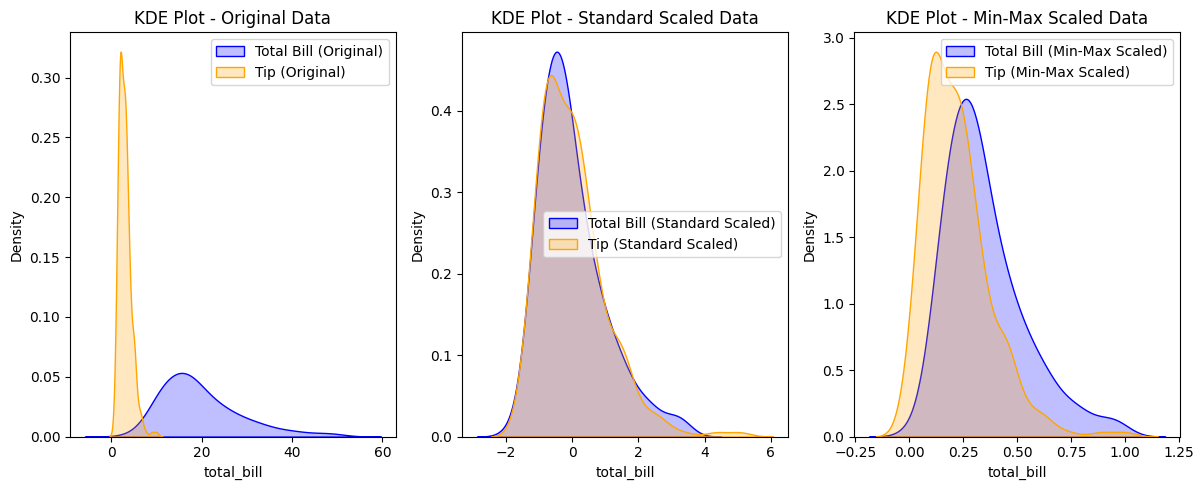

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load tips dataset
tips = sns.load_dataset('tips')

# Hypothetical full data for tips dataset (sample data)
total_bill = tips.total_bill
tip = tips.tip

# Standard Scaling
def standard_scale(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return (data - mean) / std_dev

total_bill_standard = standard_scale(total_bill)
tip_standard = standard_scale(tip)

# Min-Max Scaling
def minmax_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    return (data - min_val) / (max_val - min_val)

total_bill_minmax = minmax_scale(total_bill)
tip_minmax = minmax_scale(tip)

# Plot KDE for Original Data
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.kdeplot(total_bill, fill=True, color='blue', label='Total Bill (Original)')
sns.kdeplot(tip, fill=True, color='orange', label='Tip (Original)')
plt.title('KDE Plot - Original Data')
plt.legend()

# Plot KDE for Standard Scaled Data
plt.subplot(1, 3, 2)
sns.kdeplot(total_bill_standard, fill=True, color='blue', label='Total Bill (Standard Scaled)')
sns.kdeplot(tip_standard, fill=True, color='orange', label='Tip (Standard Scaled)')
plt.title('KDE Plot - Standard Scaled Data')
plt.legend()

# Plot KDE for Min-Max Scaled Data
plt.subplot(1, 3, 3)
sns.kdeplot(total_bill_minmax, fill=True, color='blue', label='Total Bill (Min-Max Scaled)')
sns.kdeplot(tip_minmax, fill=True, color='orange', label='Tip (Min-Max Scaled)')
plt.title('KDE Plot - Min-Max Scaled Data')
plt.legend()

plt.tight_layout()
plt.show()

**Observations**:
1. **Original Data**:
   - The **total_bill** column has a wider range compared to the **tip** column, indicating that total_bill dominates in magnitude. This could cause bias in models sensitive to feature scales.

2. **Standard Scaling**:
   - After standard scaling, both **total_bill** and **tip** distributions are centered around 0 with unit variance.
   - The relative spread of the distributions remains consistent, but their magnitudes are equalized, making them suitable for algorithms like SVM or PCA.

3. **Min-Max Scaling**:
   - Both columns are now scaled to a fixed range [0, 1].
   - The relative distances between values within each feature are preserved, making this scaling ideal for models like neural networks or visualizations where bounded values are required.

4. **Comparison**:
   - **Standard Scaling**: Useful for algorithms requiring normally distributed data or equal variance across features.
   - **Min-Max Scaling**: Ideal for datasets that need bounded input values, ensuring features lie within the same range.
